In this notebook, we're going to build a dataset of news article text and images, enhanced with insights from Cognitive Services. It relies on code similar to what you've written:

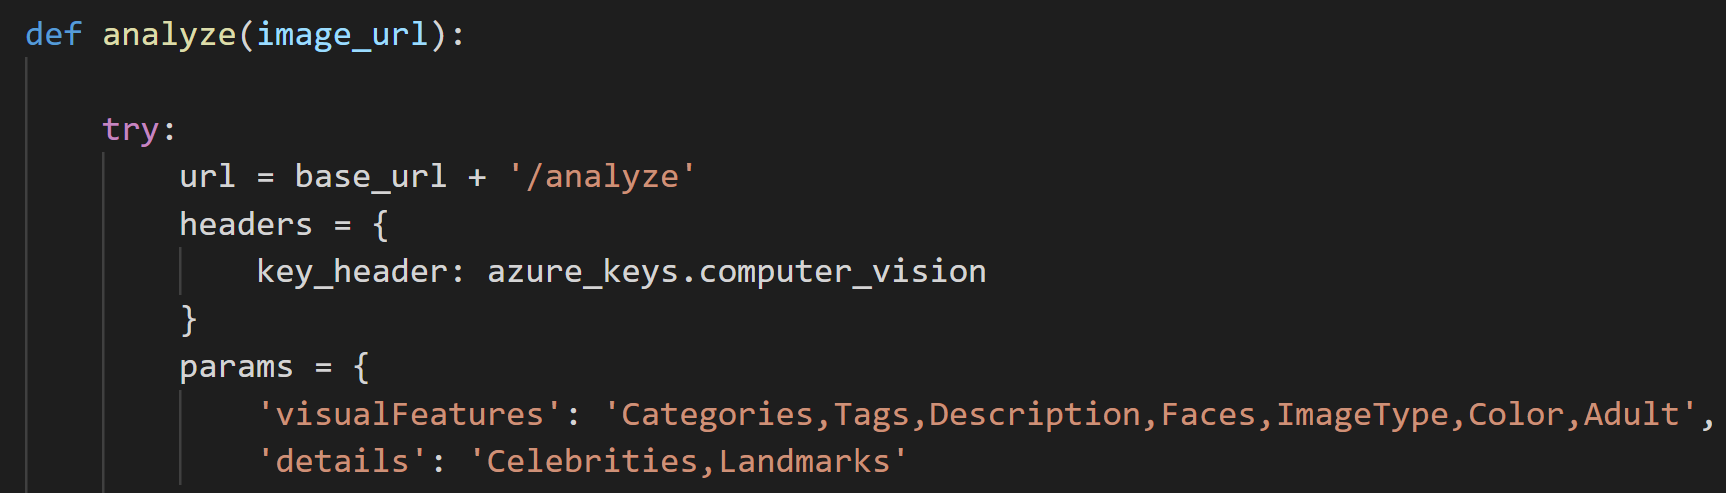

Before we begin, you must provide API keys for the Cognitive Services we're going to use. During the workshop, a link will be provided containing temporary keys.

In [ ]:
%%writefile azure_keys.py
# replace empty strings
bing_news = ''
computer_vision = ''
face_api = ''
text_analytics = ''

You might have to restart the notebook kernel for it to find the newly created 'azure_keys.py':

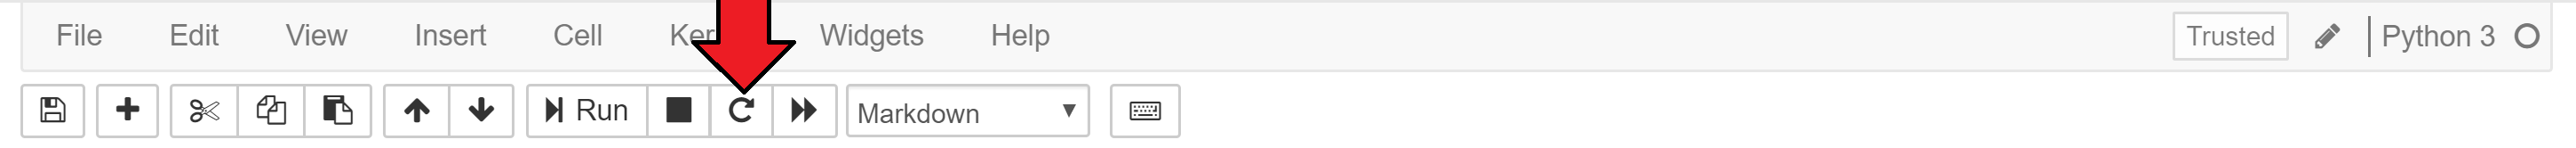

With the keyfile in place, we should be able to load our pre-written dataset builder, which includes clients for all of the Cognitive Services:

In [1]:
import dataset_builder

Our use case is brand analysis, but you can actually analyze results for any keyword, since behind the scenes we're just using Bing. However, the rest of the analysis will focus on obtaining public perception and marketing insights.

** If you can't get this section to work, don't worry! Premade datasets have been provided for a few keywords. **
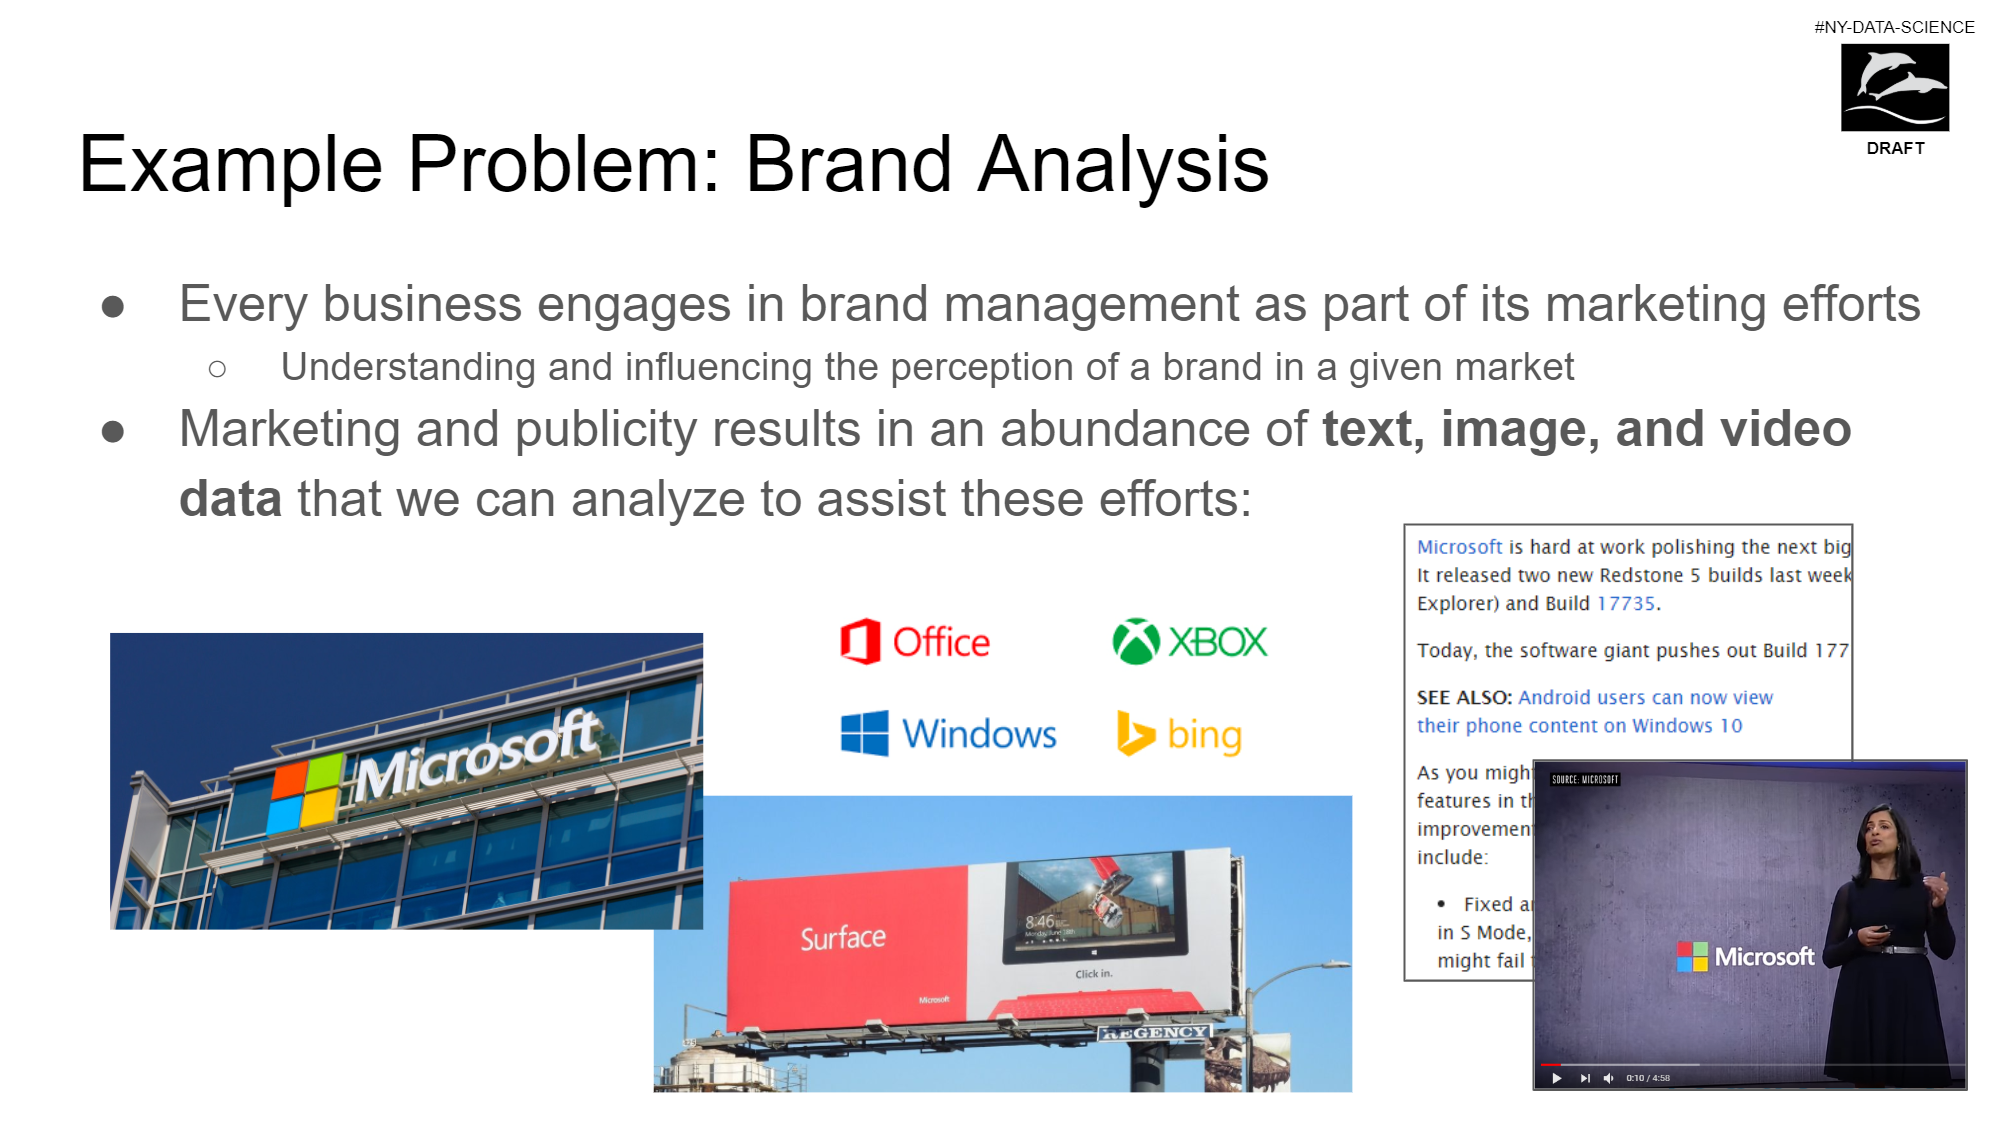

In [ ]:
# choose a brand (replace the empty string)
brand = ''

Now, we're ready to retrieve the articles.

**Unless you're using your own API keys, please do not change the second argument of get_articles unless otherwise instructed.**
We'll make you pay for the API calls ;)

In [ ]:
articles = dataset_builder.get_articles(brand, 100)
print('first article: ' + articles[0]['name'])

Let's continue and add sentiments for all the headlines. Sentiment is on a 0-1 scale (1 being most positive).

In [ ]:
dataset_builder.add_headline_sentiments(articles)
print('first article sentiment: ' + str(articles[0]['headlineSentiment']))

...and for the article texts, we'll extract key phrases and named entities.

In [ ]:
dataset_builder.add_text_key_phrases(articles)
dataset_builder.add_text_entities(articles)
print('first article key phrases:')
print(articles[0]['textKeyPhrases'])

For articles with image links, we're going to run every model available via Computer Vision (Categories,Tags,Description,Faces,ImageType,Color,Adult):

In [ ]:
dataset_builder.add_image_analysis(articles)

...and, finally, look for faces in the images. After, we'll dump all of the raw results into a JSON file for safe keeping.

In [ ]:
dataset_builder.add_image_faces(articles)
dataset_builder.dump(brand, articles)
dataset_builder.flatten(brand, articles)